## CIFAR-10 dataset
* color images - 32x32 pixels
* 50K training set, 6K test set
* Output 0-9 categories

## Procedure
#### STEP 1 : Data pre-processing
    Load mnist dataset from keras library
    Normalize the feature values
    One-hot encoding for o/p labels 
#### STEP 2 : Model creation
    Few convolution, Pooling layers => Fully connected layers => o/p layer (softmax for multi class classification)
    Early stopping call back
#### STEP 3 : Model evaluation
    Metrics
    confusion matrix

In [1]:
import matplotlib.pyplot as plt

## STEP 1 : Data pre-processing

#### Load cifar-10 dataset from keras library

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 128s 1us/step


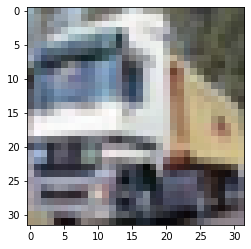

In [7]:
#Display an image from the training set
plt.imshow(x_train[1])

In [8]:
#corresponding label
y_train[1]

array([9], dtype=uint8)

In [10]:
x_train.shape

(50000, 32, 32, 3)

In [11]:
y_train.shape

(50000, 1)

#### Normalize the feature values

In [12]:
x_train.min()

0

In [13]:
x_train.max()

255

In [14]:
#normalize with grayscale intensity limits
x_train = x_train/255
x_test = x_test/255

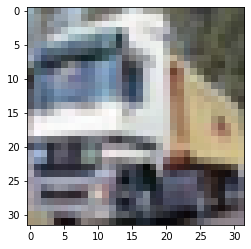

In [15]:
plt.imshow(x_train[1])

#### Reshae training and test data as per standard format

In [16]:
#Input data size is as per the standards : num_samples X width X Hegiht X num_color_channels

#### one-hot encoding for multi-class output labels

In [17]:
from tensorflow.keras.utils import to_categorical

In [18]:
y_train.shape

(50000, 1)

In [19]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [20]:
y_train = to_categorical(y_train) # auto derice number of classes from the data
y_train.shape

(50000, 10)

In [21]:
y_train[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [22]:
y_test_categorical = to_categorical(y_test) # auto derive number of classes from the data
y_test_categorical.shape

(10000, 10)

## STEP 2 : Model creation

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten, Dense, Dropout

#### Create CNN model

In [29]:
model = Sequential()

#i/p image size = (32, 32, 3)

# convolution layer
model.add(Conv2D(filters = 32, kernel_size = (3, 3), strides = (1,1), padding = 'valid', input_shape = x_train.shape[1:])) # o/p image shape = (30, 30, 32)
#pooling layers
model.add(MaxPooling2D(pool_size = (2,2), strides = None, padding = 'valid')) # o/p image shape = (15, 15, 32)

# convolution layer
model.add(Conv2D(filters = 32, kernel_size = (3, 3), strides = (1,1), padding = 'valid')) # o/p image shape = (13, 13, 32)
#pooling layers
model.add(MaxPooling2D(pool_size = (2,2), strides = None, padding = 'valid')) # o/p image shape = (6, 6, 32)

#Flatten the layer - Fully connected later
model.add(Flatten()) # o/p image shape = (6x6x32, 1) = (1152, 1)

#Fully connected later
model.add(Dense(units = 256, activation = 'relu'))

#o/p layer
model.add(Dense(units = 10, activation = 'softmax'))

#compile the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

#### Model kernel summary

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               295168    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

#### Create call back for early stopping

In [33]:
from tensorflow.keras.callbacks import EarlyStopping
cb_earlystop = EarlyStopping(monitor = 'val_loss', patience = 2)

#### Train the model

In [34]:
model.fit(x_train, y_train, batch_size = 128, epochs = 20, validation_data = (x_test, y_test_categorical), callbacks = [cb_earlystop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 52s 1ms/sample - loss: 1.5185 - accuracy: 0.4610 - val_loss: 1.2965 - val_accuracy: 0.5420
Epoch 2/20
50000/50000 [==============================] - 42s 838us/sample - loss: 1.1534 - accuracy: 0.5990 - val_loss: 1.1269 - val_accuracy: 0.6039
Epoch 3/20
50000/50000 [==============================] - 40s 793us/sample - loss: 0.9833 - accuracy: 0.6590 - val_loss: 1.0212 - val_accuracy: 0.6457
Epoch 4/20
50000/50000 [==============================] - 41s 820us/sample - loss: 0.8665 - accuracy: 0.7020 - val_loss: 0.9835 - val_accuracy: 0.6592
Epoch 5/20
50000/50000 [==============================] - 42s 840us/sample - loss: 0.7701 - accuracy: 0.7354 - val_loss: 0.9827 - val_accuracy: 0.6696
Epoch 6/20
50000/50000 [==============================] - 41s 828us/sample - loss: 0.6850 - accuracy: 0.7634 - val_loss: 0.9750 - val_accuracy: 0.6709
Epoch 7/20
50000/50000 [======================

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns

In [37]:
model_history = pd.DataFrame(model.history.history)

In [38]:
model_history

,loss,accuracy,val_loss,val_accuracy
0,1.518452,0.46100,1.296470,0.5420
1,1.153403,0.59896,1.126938,0.6039
2,0.983275,0.65898,1.021153,0.6457
3,0.866546,0.70198,0.983490,0.6592
4,0.770117,0.73540,0.982659,0.6696
5,0.684959,0.76344,0.974981,0.6709
6,0.605284,0.79226,0.986012,0.6835
7,0.529981,0.81918,1.004026,0.6786


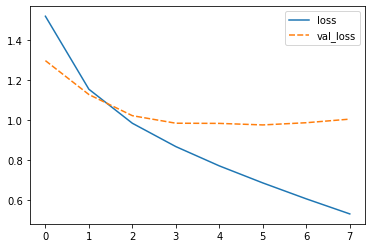

In [39]:
# Plot loss metric
sns.lineplot(data = model_history[['loss', 'val_loss']])

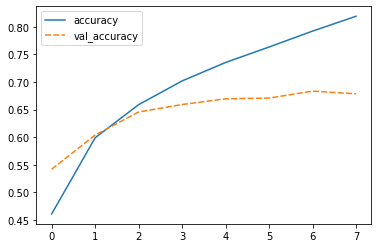

In [40]:
# Plot accuracy metric
sns.lineplot(data = model_history[['accuracy', 'val_accuracy']])

## STEP 3 : Model evaluation

#### Predict classes

In [41]:
model.evaluate(x_test, y_test_categorical, verbose = 0)

[1.004026310634613, 0.6786]

In [42]:
y_pred = model.predict_classes(x_test)

In [43]:
y_pred.shape

(10000,)

In [44]:
y_pred

array([3, 1, 1, ..., 5, 1, 7], dtype=int64)

#### Evaluation metrics

In [45]:
from sklearn.metrics import confusion_matrix, classification_report

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.71      0.71      1000
           1       0.76      0.80      0.78      1000
           2       0.63      0.50      0.56      1000
           3       0.50      0.51      0.51      1000
           4       0.63      0.63      0.63      1000
           5       0.62      0.52      0.57      1000
           6       0.79      0.74      0.76      1000
           7       0.63      0.81      0.70      1000
           8       0.79      0.78      0.78      1000
           9       0.71      0.79      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



In [48]:
confusion_matrix(y_test, y_pred)

array([[710,  35,  46,  20,  24,   7,   2,  18,  81,  57],
       [ 20, 803,   7,   9,   6,   4,   6,   6,  31, 108],
       [ 81,  14, 500,  68, 111,  70,  50,  75,  14,  17],
       [ 20,  19,  65, 514,  75, 133,  50,  68,  18,  38],
       [ 21,   4,  47,  63, 630,  27,  38, 145,  17,   8],
       [ 16,   8,  52, 207,  43, 521,  29, 107,   7,  10],
       [ 14,  14,  37,  79,  51,  24, 737,  17,   8,  19],
       [ 15,  10,  23,  31,  39,  44,   9, 805,   5,  19],
       [ 60,  57,  11,  19,  14,   3,   4,  11, 778,  43],
       [ 32,  92,   5,  12,   4,   6,   3,  34,  24, 788]], dtype=int64)

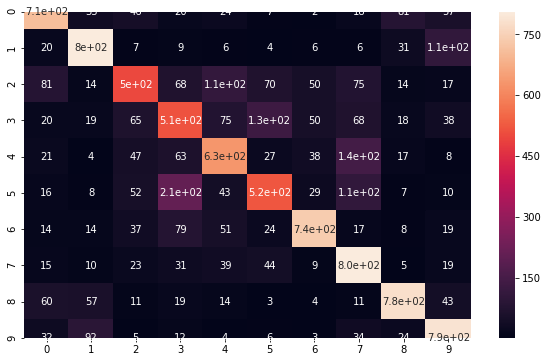

In [49]:
plt.figure(figsize = (10,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)

#### Predicting output for new input image

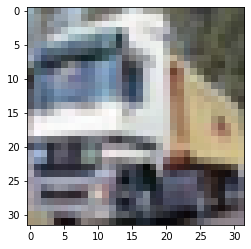

In [51]:
x_image = x_train[1]
plt.imshow(x_image)

In [52]:
y_pred_image = model.predict_classes(x_image.reshape(1, 32, 32, 3))

In [53]:
y_pred_image

array([9], dtype=int64)